# Assignment 3: Object Detection


## Priyansh Khunger
#### Roll no- 2020101056



## Q1: Face detection and association-based tracking 

### 1.1 Data preparation

In [1]:
import os
import subprocess

# Define the output directory for frames
output_dir = "frames"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# delete all files in the directory
else:
    for file in os.listdir(output_dir):
        os.remove(os.path.join(output_dir, file))


# Use ffmpeg to burst the first 30 seconds of the video into frames
video_file = "video.mp4"
output_pattern = os.path.join(output_dir, "frame_%03d.jpg")
command = ["ffmpeg", "-i", video_file, "-vf", "fps=24", "-t", "30", output_pattern]

subprocess.call(command)

print(f"Frames extracted from the first 30 seconds and saved to {output_dir}")


Frames extracted from the first 30 seconds and saved to frames


###  1.2 Face detection

In [2]:
import cv2
import os
import time

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the directory containing frames
frames_dir = "frames"

# Create a directory to save frames with detected faces
output_dir = "frames_with_faces"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# delete all files in the directory
else:
    for file in os.listdir(output_dir):
        os.remove(os.path.join(output_dir, file))


total_processing_time = 0
num_frames_processed = 0

# Loop through each frame
for filename in os.listdir(frames_dir):
    # Read the frame
    frame_path = os.path.join(frames_dir, filename)
    frame = cv2.imread(frame_path)

    # Convert the frame to grayscale (required by the face detector)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    start_time = time.time()
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    end_time = time.time()

    # Calculate the time taken to process the frame
    processing_time = end_time - start_time
    total_processing_time += processing_time
    num_frames_processed += 1

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the processed frame with detected faces
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, frame)

    print(f"Processed {filename} in {processing_time:.2f} seconds")

# Calculate average processing time
average_processing_time = total_processing_time / num_frames_processed
print(f"Average processing time per frame: {average_processing_time:.2f} seconds")

# print total number of processed frammes with time
print(f"Total number of processed frames: {num_frames_processed}")

# print total processing time
print(f"Total processing time: {total_processing_time:.2f} seconds")

print("Frames with detected faces saved to", output_dir)


Processed frame_001.jpg in 0.81 seconds
Processed frame_002.jpg in 0.05 seconds
Processed frame_003.jpg in 0.04 seconds
Processed frame_004.jpg in 0.05 seconds
Processed frame_005.jpg in 0.04 seconds
Processed frame_006.jpg in 0.04 seconds
Processed frame_007.jpg in 0.04 seconds
Processed frame_008.jpg in 0.05 seconds
Processed frame_009.jpg in 0.03 seconds
Processed frame_010.jpg in 0.05 seconds
Processed frame_011.jpg in 0.04 seconds
Processed frame_012.jpg in 0.04 seconds
Processed frame_013.jpg in 0.03 seconds
Processed frame_014.jpg in 0.05 seconds
Processed frame_015.jpg in 0.04 seconds
Processed frame_016.jpg in 0.05 seconds
Processed frame_017.jpg in 0.04 seconds
Processed frame_018.jpg in 0.05 seconds
Processed frame_019.jpg in 0.03 seconds
Processed frame_020.jpg in 0.03 seconds
Processed frame_021.jpg in 0.05 seconds
Processed frame_022.jpg in 0.04 seconds
Processed frame_023.jpg in 0.04 seconds
Processed frame_024.jpg in 0.06 seconds
Processed frame_025.jpg in 0.04 seconds




1. **Feature Selection in Cascade Classifiers**: The selection of features used by the cascade classifier directly influences processing time. More complex feature sets require more computation per frame, while simpler feature sets can lead to faster detection but may sacrifice some accuracy.

2. **Cascade Architecture and Stage Configuration**: The architecture of the cascade classifier and the configuration of its stages play a crucial role in determining processing time. Increasing the number of stages in the cascade can improve accuracy but also extends processing time due to more complex decision-making processes at each stage.

3. **Scale and Search Window Parameters**: Parameters such as the scale factor and the size of the search window affect the efficiency of the algorithm. Smaller search windows and larger scale factors can speed up processing but may miss smaller or distant faces, while larger search windows and smaller scale factors increase accuracy at the cost of processing time.

In [ ]:
import cv2
import os
import time
import numpy as np

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the directory containing frames
frames_dir = "frames"

# Function to perform face detection and measure processing time
def detect_faces(frame, scaleFactor, minNeighbors, minSize):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    start_time = time.time()
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
    end_time = time.time()
    processing_time = end_time - start_time
    return len(faces), processing_time

# Define the parameter grids for grid search
scaleFactors = [1.05, 1.1, 1.2]
minNeighbors_list = [3, 5, 8]
minSizes = [(20, 20), (30, 30), (40, 40)]

# Perform grid search
best_params = None
best_detection_count = 0

for scaleFactor in scaleFactors:
    for minNeighbors in minNeighbors_list:
        for minSize in minSizes:
            total_detection_count = 0
            total_processing_time = 0

            for filename in os.listdir(frames_dir):
                frame_path = os.path.join(frames_dir, filename)
                frame = cv2.imread(frame_path)
                detection_count, processing_time = detect_faces(frame, scaleFactor, minNeighbors, minSize)
                total_detection_count += detection_count
                total_processing_time += processing_time

            average_detection_count = total_detection_count / len(os.listdir(frames_dir))

            print(f"scaleFactor={scaleFactor}, minNeighbors={minNeighbors}, minSize={minSize}, Average detection count: {average_detection_count:.2f}")


            if average_detection_count > best_detection_count:
                best_detection_count = average_detection_count
                best_params = {'scaleFactor': scaleFactor, 'minNeighbors': minNeighbors, 'minSize': minSize}

print("Best parameters:", best_params)
print("Average detection count:", best_detection_count)


scaleFactor=1.05, minNeighbors=3, minSize=(20, 20), Average detection count: 1.85
scaleFactor=1.05, minNeighbors=3, minSize=(30, 30), Average detection count: 1.60
scaleFactor=1.05, minNeighbors=3, minSize=(40, 40), Average detection count: 1.39
scaleFactor=1.05, minNeighbors=5, minSize=(20, 20), Average detection count: 1.11
scaleFactor=1.05, minNeighbors=5, minSize=(30, 30), Average detection count: 0.98
scaleFactor=1.05, minNeighbors=5, minSize=(40, 40), Average detection count: 0.88
scaleFactor=1.05, minNeighbors=8, minSize=(20, 20), Average detection count: 0.70
scaleFactor=1.05, minNeighbors=8, minSize=(30, 30), Average detection count: 0.62
scaleFactor=1.05, minNeighbors=8, minSize=(40, 40), Average detection count: 0.59
scaleFactor=1.1, minNeighbors=3, minSize=(20, 20), Average detection count: 0.93
scaleFactor=1.1, minNeighbors=3, minSize=(30, 30), Average detection count: 0.82
scaleFactor=1.1, minNeighbors=3, minSize=(40, 40), Average detection count: 0.76
scaleFactor=1.1, mi

- Smaller scale factors and smaller minimum window size increase the number of windows to search, leading to longer processing times but also gives more detection.

### 1.3 Face detection visualization


In [1]:
import subprocess
import os

# Define the directory containing frames
input_dir = "frames_with_faces"

# Check if the output directory exists
if not os.path.exists(input_dir):
    print("Error: Frames with faces directory not found.")
else:
    # Define the output video path
    output_video = "output_video.mp4"

    # Check if the output video file already exists delete it
    if os.path.exists(output_video):
        os.remove(output_video)

    # Construct the ffmpeg command
    ffmpeg_cmd = [
        "ffmpeg",
        "-r", "24",
        "-i", f"{input_dir}/frame_%03d.jpg",
        "-c:v", "libx264",
        "-vf", "fps=24",
        "-pix_fmt", "yuv420p",
        output_video
    ]

    # Execute the ffmpeg command using subprocess
    subprocess.call(ffmpeg_cmd)

    print("Video with face detections saved as:", output_video)


Video with face detections saved as: output_video.mp4


conclusions about when does the face detector work or fail


1. **Variability in Face Size**: The algorithm's performance is influenced by face size; larger faces are detected more reliably, while smaller ones may be overlooked or falsely identified. Proper parameter tuning is essential to ensure accurate detection across different face scales.

2. **Challenges with Face Orientation**: The detector's effectiveness depends on face orientation relative to the camera. Directly facing faces are detected with higher accuracy, while extreme angles or non-frontal orientations may lead to detection inconsistencies. Robust algorithms capable of handling variations in face orientation are crucial for reliable detections in diverse scenarios.

3. **Lighting Conditions and Shadows**: Adequate lighting is essential for accurate face detection, as shadows and low-light environments are hindering the algorithm's performance. Adjusting parameters to account for varying lighting conditions can improve detection accuracy and reduce false positives.

4. **False Positives and Noise**: The algorithm is producing false positives due to noise or background elements that resemble facial features. 

### Association-based tracking

(i) Generate face tracks

In [3]:
import cv2
import os
import numpy as np

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the directory containing frames
frames_dir = "frames"

# Create a directory to save frames with detected faces and tracks
output_dir = "frames_with_tracks"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# delete all files in the directory if it already exists
else:
    for file in os.listdir(output_dir):
        os.remove(os.path.join(output_dir, file))

# Initialize variables to keep track of unique tracks
next_track_id = 1
tracks = {}
unique_tracks = set()  # Set to store unique track IDs

# Function to calculate IoU (Intersection over Union) between two bounding boxes
def calculate_iou(box1, box2):
    x1_tl, y1_tl, w1, h1 = box1
    x2_tl, y2_tl, w2, h2 = box2

    x1_br, y1_br = x1_tl + w1, y1_tl + h1
    x2_br, y2_br = x2_tl + w2, y2_tl + h2

    x_overlap = max(0, min(x1_br, x2_br) - max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br) - max(y1_tl, y2_tl))

    intersection = x_overlap * y_overlap
    union = (w1 * h1) + (w2 * h2) - intersection

    iou = intersection / union
    return iou

# Loop through each frame
for filename in os.listdir(frames_dir):
    # Read the frame
    frame_path = os.path.join(frames_dir, filename)
    frame = cv2.imread(frame_path)
    frame_with_tracks = frame.copy()

    # Convert the frame to grayscale (required by the face detector)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Initialize a list to store new face tracks for the current frame
    new_tracks = []

    # Loop through each detected face
    for (x, y, w, h) in faces:
        # Calculate the bounding box coordinates
        box = (x, y, w, h)

        # Check for existing tracks to associate with
        matched_track_id = None
        best_iou = 0
        for track_id, track_box in tracks.items():
            iou = calculate_iou(box, track_box)
            if iou > 0.5 and iou > best_iou:
                matched_track_id = track_id
                best_iou = iou

        # Assign a track ID or start a new track
        if matched_track_id is not None:
            track_id = matched_track_id
        else:
            track_id = next_track_id
            next_track_id += 1

        # Update the track with the new box
        tracks[track_id] = box

        # Draw rectangle around the face with track ID
        cv2.rectangle(frame_with_tracks, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Add the track ID to the set of unique tracks
        unique_tracks.add(track_id)

        # Add the track to the list of new tracks
        new_tracks.append(track_id)

    # Remove tracks not seen in the current frame
    tracks = {track_id: box for track_id, box in tracks.items() if track_id in new_tracks}

    # Save the frame with tracks
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, frame_with_tracks)

print("Face tracks generated and saved.")

# Calculate the number of unique tracks created
num_unique_tracks = len(unique_tracks)
print("Number of unique tracks created:", num_unique_tracks)

# Now use ffmpeg to stitch together the frames with tracks into a new video
output_video = "output_video_with_tracks.mp4"

# if output_video already exists, delete it
if os.path.exists(output_video):
    os.remove(output_video)

ffmpeg_cmd = f"ffmpeg -r 24 -i {output_dir}/frame_%03d.jpg -c:v libx264 -vf fps=24 -pix_fmt yuv420p {output_video}"
subprocess.call(ffmpeg_cmd, shell=True)

print("Video with face tracks saved as:", output_video)


Face tracks generated and saved.
Number of unique tracks created: 113
Video with face tracks saved as: output_video_with_tracks.mp4


(ii) Update the video visualization above to now include a unique track identifier

In [1]:
import cv2
import os
import numpy as np
import subprocess

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the directory containing frames
frames_dir = "frames"

# Create a directory to save frames with detected faces and tracks
output_dir = "frames_with_tracks"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# delete all files in the directory if it already exists
else:
    for file in os.listdir(output_dir):
        os.remove(os.path.join(output_dir, file))

# Initialize variables to keep track of unique tracks
next_track_id = 1
tracks = {}
unique_tracks = set()  # Set to store unique track IDs

# Function to calculate IoU (Intersection over Union) between two bounding boxes
def calculate_iou(box1, box2):
    x1_tl, y1_tl, w1, h1 = box1
    x2_tl, y2_tl, w2, h2 = box2

    x1_br, y1_br = x1_tl + w1, y1_tl + h1
    x2_br, y2_br = x2_tl + w2, y2_tl + h2

    x_overlap = max(0, min(x1_br, x2_br) - max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br) - max(y1_tl, y2_tl))

    intersection = x_overlap * y_overlap
    union = (w1 * h1) + (w2 * h2) - intersection

    iou = intersection / union
    return iou

# Loop through each frame
for filename in os.listdir(frames_dir):
    # Read the frame
    frame_path = os.path.join(frames_dir, filename)
    frame = cv2.imread(frame_path)
    frame_with_tracks = frame.copy()

    # Convert the frame to grayscale (required by the face detector)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Initialize a list to store new face tracks for the current frame
    new_tracks = []

    # Loop through each detected face
    for (x, y, w, h) in faces:
        # Calculate the bounding box coordinates
        box = (x, y, w, h)

        # Check for existing tracks to associate with
        matched_track_id = None
        best_iou = 0
        for track_id, track_box in tracks.items():
            iou = calculate_iou(box, track_box)
            if iou > 0.5 and iou > best_iou:
                matched_track_id = track_id
                best_iou = iou

        # Assign a track ID or start a new track
        if matched_track_id is not None:
            track_id = matched_track_id
        else:
            track_id = next_track_id
            next_track_id += 1

        # Update the track with the new box
        tracks[track_id] = box

        # Draw rectangle around the face with track ID
        cv2.rectangle(frame_with_tracks, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame_with_tracks, str(track_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Add the track ID to the set of unique tracks
        unique_tracks.add(track_id)

        # Add the track to the list of new tracks
        new_tracks.append(track_id)

    # Remove tracks not seen in the current frame
    tracks = {track_id: box for track_id, box in tracks.items() if track_id in new_tracks}

    # Save the frame with tracks
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, frame_with_tracks)

print("Face tracks generated and saved.")

# Calculate the number of unique tracks created
num_unique_tracks = len(unique_tracks)
print("Number of unique tracks created:", num_unique_tracks)

# Now use ffmpeg to stitch together the frames with tracks into a new video
output_video = "output_video_with_tracks.mp4"

# if output_video already exists, delete it
if os.path.exists(output_video):
    os.remove(output_video)

ffmpeg_cmd = f"ffmpeg -r 24 -i {output_dir}/frame_%03d.jpg -c:v libx264 -vf fps=24 -pix_fmt yuv420p {output_video}"
subprocess.call(ffmpeg_cmd, shell=True)

print("Video with face tracks saved as:", output_video)


Face tracks generated and saved.
Number of unique tracks created: 113
Video with face tracks saved as: output_video_with_tracks.mp4


(iii) Comment about the quality of the face tracks.

The quality of the face tracks varies throughout the video. 

There are inconsistencies where a unique character is not consistently associated with one unique track ID. 

For example, at frame 8, the girl has track number 3, but for next few frames, she is not assigned any track ID. Then in frame 12, she is assigned track number 4. This inconsistency in track assignment can lead to errors in tracking and identification of individuals.

Similarly, at timestamp 0:10, the background receives multiple track IDs intermittently due to sudden changes in lighting conditions, causing the algorithm to lose track and reassign IDs incorrectly. 

Different people arent getting associated in one track, but a unique character is not associated with one unique track id.

These instances highlight the challenges faced by the face tracking algorithm in maintaining accurate and consistent associations between individuals and track IDs, particularly in scenarios involving overlapping faces or abrupt changes in lighting.

## Q2: YOLO Object Detection

### 2.1 Data preparation

The dataset for fine-tuning the YOLO v8 nano detector is downloade, specifically focusing on ducks. It comprises separate directories for images and labels, each containing training and validation sets.

### 2.2 Understanding YOLO object detector

Single-shot detectors like YOLO differ from the R-CNN series primarily in their approach to object detection. While R-CNN series methods rely on a multi-stage process involving region proposal generation and subsequent classification, YOLO performs detection in a single step by dividing the input image into a grid and directly predicting bounding boxes and class probabilities for each grid cell.

As for different versions of YOLO:

1. **YOLOv3**: Introduced in 2018, YOLOv3 significantly improved object detection with a more efficient backbone network, the integration of multiple anchors for better localization, and the utilization of spatial pyramid pooling, which allowed for more accurate detection across different scales and aspect ratios, thus advancing both accuracy and speed.

2. **YOLOv4**: Launched in 2020, YOLOv4 brought notable advancements to the model by introducing novel techniques such as Mosaic data augmentation, an anchor-free detection head, and a new loss function. These innovations aimed to enhance detection performance, particularly in challenging scenarios, and further solidify YOLO's position as a leading object detection framework.

3. **YOLOv5**: Released as an evolution of its predecessors, YOLOv5 brought improvements in both performance and user experience. It implemented features like hyperparameter optimization, integrated experiment tracking, and automatic export to popular formats, streamlining the process of model development and deployment while maintaining a focus on simplicity and effectiveness in object detection tasks.

Each version of YOLO brings advancements in terms of architecture, feature utilization, and optimization, aiming to achieve better accuracy, speed, and efficiency in object detection tasks.


### 2.3 Hands on with ultralytics.

In [19]:
import torch
from ultralytics import YOLO

# Create a YOLOv8n model instance
model = YOLO('yolov8n.yaml')

# Check the number of model parameters
print(f"Number of model parameters: {sum(x.numel() for x in model.parameters())}")

# Check the number of convolutional layers
num_conv_layers = sum(1 for name, module in model.named_modules() if isinstance(module, torch.nn.Conv2d))
print(f"Number of convolutional layers: {num_conv_layers}")

Number of model parameters: 3157200
Number of convolutional layers: 64


In [15]:
import torch
from ultralytics import YOLO

# Create a YOLOv8m model instance
model = YOLO('yolov8m.yaml')

# Check the number of model parameters
print(f"Number of model parameters: {sum(x.numel() for x in model.parameters())}")

# Check the number of convolutional layers
num_conv_layers = sum(1 for name, module in model.named_modules() if isinstance(module, torch.nn.Conv2d))
print(f"Number of convolutional layers: {num_conv_layers}")

Number of model parameters: 25902640
Number of convolutional layers: 84


### 2.4 Training YOLO variants.


(i) Create two versions of the training dataset. train1 containing 100 images. train2 containing all 400 images.
You may slice the dataset randomly. Create copies of the config.yaml that came with the dataset zip file
accordingly (point to the right directories).

In [4]:
import os
import shutil
import random

# Define paths
archive_dir = "archive"
train1_dir = "train1"
train2_dir = "train2"

# Function to copy files from source directory to destination directory
def copy_files(source_dir, destination_dir, num_images=None):
    os.makedirs(destination_dir, exist_ok=True)  # Create destination directory if it doesn't exist
    files = os.listdir(source_dir)  # List files in source directory
    if num_images is not None:  # If num_images is specified, randomly select files
        files = random.sample(files, num_images)
    for file in files:
        source_file = os.path.join(source_dir, file)
        destination_file = os.path.join(destination_dir, file)
        shutil.copyfile(source_file, destination_file)  # Copy file to destination directory

# Create train1 dataset (100 images from train and all from val)
train1_images_count = 100
train_images = os.listdir(os.path.join(archive_dir, "images", "train"))
copy_files(os.path.join(archive_dir, "images", "train"), os.path.join(train1_dir, "images", "train"), train1_images_count)

selected_images = os.listdir(os.path.join(archive_dir, "images", "train"))[:train1_images_count]

# make directory for labels
os.makedirs(os.path.join(train1_dir, "labels", "train"), exist_ok=True)
for image in selected_images:
    label_file = image.replace(".png", ".txt")
    source_label = os.path.join(archive_dir, "labels", "train", label_file)
    destination_label = os.path.join(train1_dir, "labels", "train", label_file)
    # print(source_label, destination_label)
    shutil.copyfile(source_label, destination_label)
copy_files(os.path.join(archive_dir, "images", "val"), os.path.join(train1_dir, "images", "val"))
copy_files(os.path.join(archive_dir, "labels", "val"), os.path.join(train1_dir, "labels", "val"))

# Create train2 dataset (copy entire archive)
shutil.copytree(os.path.join(archive_dir, "images"), os.path.join(train2_dir, "images"))
shutil.copytree(os.path.join(archive_dir, "labels"), os.path.join(train2_dir, "labels"))

print("Datasets creation completed.")


Datasets creation completed.


(ii) On both training dataset variants above, train three variants of the Yolo v8 models: (a) yolov8n initialized
from scratch; (b) yolov8n from pretrained weights; and (c) yolov8m from pretrained weights.


#### For train1

(a) yolov8n initialized from scratch

In [ ]:
import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data="/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml", epochs=30)  # train the model

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 6.23M/6.23M [00:00<00:00, 282MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.45G      4.064      8.537      4.289          2        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50         52    0.00217      0.615    0.00451    0.00151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.31G      3.115      11.23      3.714          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50         52    0.00218      0.615    0.00533     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.32G      3.679      7.062      4.205          2        640: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50         52    0.00221      0.635    0.00481    0.00157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.31G      3.564      7.071      4.238          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         50         52    0.00225      0.635    0.00519    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.32G      3.435      7.355      4.299          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         50         52    0.00216      0.615    0.00463    0.00178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.31G      3.456      7.706      4.181          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         50         52    0.00231      0.654    0.00532    0.00186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.32G      3.224      7.435      4.069          7        640: 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50         52    0.00219      0.615    0.00503    0.00173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.32G      3.385      6.178      4.074          5        640: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         50         52    0.00218      0.615    0.00519     0.0017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       2.3G      3.481      7.127      3.964          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         50         52     0.0022      0.615     0.0104    0.00434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.28G      3.083      6.062      4.086          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         50         52     0.0021      0.577    0.00787      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.29G      3.011      8.322      3.369          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50         52    0.00213      0.577    0.00678    0.00219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.3G      2.554       8.11       3.23          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         52    0.00498      0.481     0.0484     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.29G      3.738      6.875      3.913          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         50         52    0.00455      0.423     0.0154      0.004



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       2.3G      3.396       6.44      3.898          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         50         52    0.00518      0.462       0.02    0.00483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.29G      3.221      6.007      3.727          3        640: 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         50         52    0.00512      0.442     0.0194     0.0053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.29G      3.419      5.765      3.669          2        640: 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         50         52    0.00529      0.462     0.0082    0.00254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.29G      2.838      7.305       3.09          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         50         52    0.00557      0.462    0.00775    0.00255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.3G      3.235      5.395      3.816          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         50         52    0.00502      0.462    0.00701    0.00239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.29G       2.88      4.818      3.614          3        640: 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         50         52    0.00495      0.481    0.00761    0.00252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.29G      2.998      5.721      3.599          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50         52    0.00228      0.596     0.0102    0.00368


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.29G      2.749      10.13      3.179          0        640: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         50         52    0.00235      0.615     0.0105    0.00397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       2.3G      2.544      8.232      3.166          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         50         52     0.0027      0.712     0.0249    0.00835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.29G      2.829      8.608      3.434          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         50         52    0.00282       0.75     0.0411     0.0114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.29G      2.525      8.719      3.395          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         50         52     0.0028       0.75     0.0404     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.29G      2.738      7.389      3.661          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         52     0.0028       0.75     0.0466     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       2.3G      2.371      8.591      2.868          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         50         52    0.00272       0.75     0.0506    0.00911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.29G      2.346      7.824      3.017          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


                   all         50         52     0.0026      0.731     0.0364    0.00812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.29G      2.833      8.147      3.431          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


                   all         50         52     0.0026      0.731     0.0203    0.00561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.29G       2.82      7.867      3.444          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         50         52    0.00272       0.75     0.0311    0.00808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       2.3G       2.82       7.74      3.652          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         50         52    0.00281      0.769     0.0322     0.0107



30 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]


                   all         50         52    0.00442      0.423      0.039     0.0077
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train


(b) yolov8n from pretrained weights

In [ ]:
import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")

# Use the model
results = model.train(data="/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml", epochs=30)  # train the model

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.42G      1.384      5.674      1.436          2        640: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         50         52    0.00333      0.962      0.459      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.31G     0.9901      9.446      1.148          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         50         52    0.00333      0.962      0.409      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.32G     0.9885       4.54      1.257          2        640: 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         50         52     0.0034      0.981      0.434      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.31G      1.122      4.527       1.29          3        640: 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         50         52     0.0034      0.981      0.375      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.34G     0.9257      4.933      1.151          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         50         52    0.00327      0.942      0.182     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.31G      1.057      5.608       1.26          2        640: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         50         52    0.00307      0.885      0.138     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.34G      1.134      5.452      1.264          7        640: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         50         52      0.003      0.865     0.0404     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.32G      1.231      4.626      1.265          5        640: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         50         52     0.0032      0.923     0.0377     0.0128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.34G      1.097      5.058        1.1          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         50         52    0.00293      0.846     0.0793      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.31G      1.123       4.44      1.131          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50         52      0.284     0.0577     0.0976     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.34G      1.034      7.337      1.085          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         50         52    0.00619       0.75     0.0613     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.32G     0.9942      7.323       1.08          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         50         52      0.262     0.0385     0.0573     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.32G       1.36      5.196      1.352          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         50         52      0.124      0.115      0.044     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.32G      1.431      6.471      1.452          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         50         52     0.0714     0.0192       0.04     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.33G      1.437       4.56      1.395          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         50         52     0.0456      0.115      0.035    0.00895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.34G      1.484      4.189      1.405          2        640: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         50         52     0.0539      0.115     0.0361     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       2.3G      1.183      6.557      1.191          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         50         52      0.104      0.231     0.0514     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.29G      1.293       3.67      1.349          2        640: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         52      0.236      0.269      0.165     0.0544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.29G      1.168      3.167      1.347          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         50         52      0.143      0.269      0.147     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.29G      1.032      3.546       1.22          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         50         52      0.177      0.154      0.104      0.028


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       2.3G      1.194      8.912      1.422          0        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         50         52      0.171      0.212      0.107     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.29G     0.9877      7.011      1.154          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         50         52       0.19       0.25     0.0876     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.29G       1.32      6.179      1.481          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         50         52      0.191      0.269      0.115     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.29G      1.099      6.674      1.449          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         50         52      0.204       0.25      0.139     0.0477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       2.3G      1.188      5.532      1.483          2        640: 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         50         52      0.222      0.269      0.143     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.29G     0.9693      6.316      1.098          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         50         52      0.228      0.289      0.141     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.29G     0.8616      5.914      1.059          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         50         52      0.255      0.289      0.198     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.29G      1.057      4.937      1.283          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         50         52       0.29      0.365      0.246      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       2.3G      0.935      5.565      1.318          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50         52      0.301      0.327      0.261      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.29G      1.097      5.242      1.467          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         50         52      0.332      0.325      0.275      0.133

30 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


                   all         50         52    0.00333      0.962      0.454      0.277
Speed: 0.4ms preprocess, 2.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train2


(c) yolov8m from pretrained weights

In [ ]:
import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.pt")

# Use the model
results = model.train(data="/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml", epochs=30)  # train the model

100%|██████████| 49.7M/49.7M [00:00<00:00, 300MB/s]


Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.41G      1.275      5.099      1.509          2        640: 100%|██████████| 7/7 [00:25<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         50         52      0.809      0.163      0.188      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.26G      1.024      9.567       1.21          0        640: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         50         52    0.00618       0.25    0.00835     0.0042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.28G     0.9458      3.671      1.246          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         50         52     0.0152      0.462     0.0113    0.00443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.27G       1.39      3.605      1.481          3        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50         52    0.00505      0.538    0.00441    0.00149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       7.3G      1.495      4.247      1.661          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         50         52     0.0543      0.115     0.0272    0.00485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.26G      1.604      3.915      1.587          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         50         52    0.00721       0.25    0.00463    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       7.3G      1.958      3.839      1.926          7        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         50         52     0.0211      0.115    0.00695    0.00218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.28G      1.967      3.314      1.979          5        640: 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         50         52   0.000761      0.212   0.000483   0.000134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       7.3G      1.674      3.504      1.774          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         50         52   0.000678     0.0769   0.000292   0.000115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.26G      1.918      3.498      2.065          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         52   0.000337     0.0769   0.000157   7.32e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       7.3G      1.594      3.324      1.754          0        640: 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50         52   0.000133     0.0385    7.2e-05   2.13e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       7.3G      1.649      4.065      1.691          0        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         50         52    0.00027     0.0769   0.000153   3.95e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.27G      2.603      3.905      2.336          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50         52     0.0004      0.115   0.000251   0.000105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       7.3G      2.416       4.03      2.245          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         50         52     0.0002     0.0577   0.000116   4.59e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       7.3G      1.973      3.364      1.903          3        640: 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         50         52     0.0006      0.173   0.000414   0.000124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.31G      2.036      3.149      2.053          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52    0.00147      0.308    0.00112   0.000334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.28G      1.795      3.544      1.776          0        640: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         50         52    0.00267     0.0769    0.00103    0.00019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       7.3G       2.16      3.464      2.202          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         52    0.00328     0.0962     0.0011   0.000216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       7.3G      1.859      3.088      2.168          3        640: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         50         52     0.0531      0.115     0.0127    0.00256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.31G      1.647      3.197      1.839          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         50         52    0.00127      0.346    0.00108   0.000352


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.27G      1.846      3.536      2.067          0        640: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         50         52    0.00176      0.442    0.00188   0.000618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.29G      1.562      3.424       1.74          0        640: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         50         52    0.00195      0.481    0.00175   0.000594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.29G       1.83      3.445      2.168          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         50         52    0.00257        0.5    0.00232   0.000684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       7.3G      2.208      3.673      2.475          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         50         52     0.0048      0.577     0.0046    0.00157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.28G      2.266      3.424       2.32          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         50         52    0.00504      0.558    0.00406    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       7.3G      1.477       2.86      1.708          0        640: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         52     0.0709     0.0577     0.0229    0.00808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       7.3G      1.361      2.466      1.657          0        640: 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         52      0.107     0.0769      0.034     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.31G      1.743      2.581      1.871          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         50         52      0.115     0.0769     0.0475     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.28G      1.673      2.679      1.849          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         50         52     0.0998     0.0577     0.0531     0.0203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.31G       1.82       2.91      2.045          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         50         52      0.125     0.0385     0.0458     0.0155



30 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]


                   all         50         52      0.809      0.163      0.188      0.149
Speed: 0.2ms preprocess, 10.3ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train3


#### For train2

(a) yolov8n initialized from scratch

In [ ]:
import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data="/content/gdrive/MyDrive/iiit/cv/train2/config2.yaml", epochs=30)  # train the model

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/gdrive/MyDrive/iiit/cv/train2/config2.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 311MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/iiit/cv/train2/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [04:36<00:00,  1.44it/s]


train: New cache created: /content/gdrive/MyDrive/iiit/cv/train2/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train2/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it]

val: New cache created: /content/gdrive/MyDrive/iiit/cv/train2/labels/val.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.41G      3.452      4.283      4.279         45        640: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all         50         52    0.00218      0.615    0.00432    0.00153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.28G       3.32      4.076      4.074         30        640: 100%|██████████| 25/25 [00:13<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         50         52    0.00219      0.615    0.00552    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.28G      3.151      3.967      3.819         34        640: 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         50         52    0.00581      0.423    0.00795    0.00278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.28G      3.082      3.841      3.571         38        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52    0.00732      0.481      0.031    0.00638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.28G      2.933      3.615      3.392         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         52     0.0728     0.0385     0.0243    0.00679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.28G      2.867      3.533      3.289         33        640: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         50         52     0.0185      0.192     0.0172    0.00455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.28G      2.785       3.42       3.19         30        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         52     0.0217      0.404     0.0154    0.00454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.28G       2.75      3.347      3.183         39        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50         52      0.136      0.135     0.0716     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.28G      2.696      3.247      3.095         42        640: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         50         52      0.125      0.346     0.0746     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.28G      2.613      3.139      2.986         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         50         52      0.184     0.0385     0.0159    0.00621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.28G      2.576      3.106      2.997         41        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         50         52      0.161      0.327      0.106     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.28G      2.518      3.048      2.927         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         50         52      0.281     0.0962       0.15     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.25G      2.469      2.977       2.89         38        640: 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         50         52      0.214      0.154      0.136      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.25G      2.479      2.987      2.911         44        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52      0.132     0.0962     0.0539     0.0173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.25G      2.443      2.912      2.884         35        640: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         52      0.217     0.0769     0.0974     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.25G      2.356      2.863      2.796         31        640: 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         50         52      0.268      0.423      0.235     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.25G      2.359      2.787      2.761         31        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52      0.301      0.289      0.209      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.25G      2.335      2.745       2.71         42        640: 100%|██████████| 25/25 [00:14<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         50         52       0.37      0.365      0.288     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.25G      2.345      2.753      2.692         31        640: 100%|██████████| 25/25 [00:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         50         52      0.305      0.296      0.261       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.25G      2.226      2.801      2.686         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50         52      0.234      0.158      0.132     0.0417


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.25G      2.203      3.036      2.695         16        640: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52      0.345      0.497      0.373       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.25G      2.126      2.893      2.625         16        640: 100%|██████████| 25/25 [00:14<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         50         52      0.306      0.423      0.309      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.25G       2.15      2.802      2.659         15        640: 100%|██████████| 25/25 [00:13<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         50         52      0.346      0.288      0.234     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.25G      2.071      2.712      2.632         17        640: 100%|██████████| 25/25 [00:13<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         52      0.347      0.385      0.332      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.25G      2.082      2.676      2.597         15        640: 100%|██████████| 25/25 [00:13<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50         52      0.453      0.442      0.339      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.25G      2.034      2.616      2.523         17        640: 100%|██████████| 25/25 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50         52      0.299      0.346      0.248       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.25G      2.035      2.601      2.516         16        640: 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         50         52       0.52       0.25      0.301      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.25G      1.986      2.525      2.506         16        640: 100%|██████████| 25/25 [00:12<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         50         52      0.447      0.442       0.41      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.25G      2.005      2.576      2.488         16        640: 100%|██████████| 25/25 [00:13<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         50         52      0.369      0.385      0.347      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.25G      1.967      2.513      2.476         15        640: 100%|██████████| 25/25 [00:13<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         50         52      0.401      0.327      0.314      0.164



30 epochs completed in 0.141 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


                   all         50         52      0.448      0.442       0.41      0.207
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train2


(b) yolov8n from pretrained weights

In [ ]:
import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")

# Use the model
results = model.train(data="/content/gdrive/MyDrive/iiit/cv/train2/config2.yaml", epochs=30)  # train the model

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train2/config2.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/gdrive/MyDrive/iiit/cv/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.35G      1.034      2.534      1.168         45        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         50         52      0.815     0.0855      0.475      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.3G      1.099      2.236      1.223         30        640: 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         50         52        0.5      0.231      0.361      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.29G      1.181      2.253      1.278         34        640: 100%|██████████| 25/25 [00:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         50         52      0.208      0.365      0.147      0.045



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.29G      1.258      2.248       1.34         38        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         50         52      0.238      0.173       0.16     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.29G      1.267      2.104      1.356         37        640: 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50         52      0.366      0.288      0.276     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.29G       1.23      2.028      1.345         33        640: 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         50         52      0.265      0.305      0.199     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.29G      1.245      1.981      1.353         30        640: 100%|██████████| 25/25 [00:13<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52      0.463      0.308      0.306      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.29G       1.23      1.907      1.324         39        640: 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         50         52      0.431      0.423      0.394      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.29G      1.189      1.831      1.322         42        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50         52      0.481      0.538      0.478      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.29G      1.173      1.751      1.295         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         50         52      0.508      0.481      0.531      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.29G      1.151      1.647      1.287         41        640: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         52      0.525      0.615      0.553      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.29G      1.151      1.557      1.295         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         50         52      0.581      0.639      0.663      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.29G      1.064      1.537      1.228         38        640: 100%|██████████| 25/25 [00:14<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         50         52      0.585      0.543      0.523      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.29G      1.066      1.519      1.215         44        640: 100%|██████████| 25/25 [00:14<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         50         52      0.606      0.682      0.699      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.29G      1.017      1.447      1.211         35        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         50         52       0.75      0.635      0.663       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.29G       1.02      1.437      1.182         31        640: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         50         52      0.636      0.504      0.609      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.29G     0.9883      1.378      1.169         31        640: 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         50         52      0.784      0.629      0.691       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.29G     0.9796      1.356      1.164         42        640: 100%|██████████| 25/25 [00:13<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         50         52      0.613      0.712       0.67        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.25G     0.9631      1.333      1.143         31        640: 100%|██████████| 25/25 [00:13<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         50         52      0.773      0.596      0.708      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.25G     0.9341      1.306      1.151         37        640: 100%|██████████| 25/25 [00:14<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         50         52      0.791      0.673      0.757      0.556


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.25G     0.9316      1.455      1.179         16        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50         52      0.765      0.692      0.684      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.25G     0.8858      1.304      1.141         16        640: 100%|██████████| 25/25 [00:13<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         50         52      0.726      0.692      0.711      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.25G      0.895       1.32      1.131         15        640: 100%|██████████| 25/25 [00:13<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         50         52      0.736      0.731       0.73      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.25G     0.8293      1.219      1.114         17        640: 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         50         52      0.703      0.727      0.781      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.25G     0.7919      1.132      1.083         15        640: 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         50         52      0.793      0.692      0.788      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.25G      0.784      1.122      1.079         17        640: 100%|██████████| 25/25 [00:14<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         50         52      0.712      0.714      0.758      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.25G     0.7777       1.11      1.055         16        640: 100%|██████████| 25/25 [00:13<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         52      0.702      0.815      0.788      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.25G     0.7273      1.056      1.038         16        640: 100%|██████████| 25/25 [00:14<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         50         52      0.748      0.788      0.808      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.25G     0.7168      1.038      1.029         16        640: 100%|██████████| 25/25 [00:13<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         50         52       0.74      0.808      0.812      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.25G     0.6997     0.9912      1.033         15        640: 100%|██████████| 25/25 [00:14<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         50         52      0.709      0.808      0.806      0.651



30 epochs completed in 0.143 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


                   all         50         52      0.747      0.788      0.808      0.657
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train3


(c) yolov8m from pretrained weights

In [ ]:
import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.pt")

# Use the model
results = model.train(data="/content/gdrive/MyDrive/iiit/cv/train2/config2.yaml", epochs=30)  # train the model

100%|██████████| 49.7M/49.7M [00:00<00:00, 335MB/s]


Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/iiit/cv/train2/config2.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/gdrive/MyDrive/iiit/cv/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.44G      1.043      2.628       1.24         45        640: 100%|██████████| 25/25 [00:20<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         50         52      0.163      0.192     0.0715     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.29G      1.323      2.213       1.48         30        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         50         52    0.00658      0.442    0.00428    0.00121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       7.3G      1.656      2.361      1.695         34        640: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50         52    0.00321      0.577    0.00265    0.00109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.28G      1.573      2.344      1.685         38        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50         52    0.00371       0.25    0.00222   0.000741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.28G      1.631      2.235      1.726         37        640: 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50         52    0.00401      0.442    0.00373    0.00112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       7.3G      1.571       2.14      1.669         33        640: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         50         52     0.0135      0.442     0.0128    0.00443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.31G      1.538      2.153      1.634         30        640: 100%|██████████| 25/25 [00:16<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         50         52     0.0326      0.173     0.0167    0.00656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.32G      1.479      2.079      1.571         39        640: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         50         52    0.00795       0.25    0.00363    0.00104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.27G      1.463      2.089      1.568         42        640: 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50         52      0.165      0.231      0.177      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.31G       1.41      1.957      1.561         37        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         50         52      0.294      0.442      0.324      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.33G      1.328      1.805      1.478         41        640: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         50         52      0.458      0.442      0.371       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.31G      1.322      1.764      1.491         37        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         50         52      0.522      0.481       0.43      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.29G      1.294      1.774      1.457         38        640: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         50         52      0.612      0.607      0.564      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       7.3G        1.3       1.73      1.435         44        640: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         50         52      0.769      0.642      0.662      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.32G      1.162      1.631      1.384         35        640: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         50         52      0.638      0.558      0.532      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.33G      1.143      1.603      1.331         31        640: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         50         52      0.508      0.481      0.429      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.28G      1.158      1.562      1.342         31        640: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         50         52      0.664      0.759      0.674      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.31G      1.127      1.591      1.334         42        640: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         50         52      0.629      0.652      0.613       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.31G      1.128      1.547      1.329         31        640: 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         50         52       0.61      0.635      0.623       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.31G      1.061      1.505      1.285         37        640: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         50         52      0.595      0.712      0.647      0.451


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.28G      1.113      1.592       1.36         16        640: 100%|██████████| 25/25 [00:20<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50         52      0.732      0.525      0.593       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.31G      1.029      1.447      1.315         16        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         50         52      0.635      0.635      0.627      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.31G      1.006      1.483      1.301         15        640: 100%|██████████| 25/25 [00:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         50         52      0.721      0.615      0.648      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       7.3G     0.9631      1.331      1.258         17        640: 100%|██████████| 25/25 [00:16<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         50         52      0.734      0.585      0.649      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.28G      0.941      1.297      1.236         15        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         50         52      0.657      0.664      0.686      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       7.3G      0.912      1.252      1.229         17        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         50         52      0.704      0.673       0.69      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.31G     0.9223      1.217      1.219         16        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50         52      0.704      0.686        0.7      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.32G     0.8455      1.208      1.167         16        640: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         50         52      0.764      0.731      0.752      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.28G     0.8391      1.198      1.156         16        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         50         52      0.802      0.673      0.744      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       7.3G      0.802      1.137      1.155         15        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         50         52      0.838      0.654      0.741       0.57



30 epochs completed in 0.176 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 52.0MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


                   all         50         52      0.764      0.731      0.752      0.573
Speed: 0.8ms preprocess, 11.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train4


(iii) In total, you should have 6 “best” model checkpoints after the training. Train all models for the same
number of epochs (e.g., 20). Report and compare the results (AP50) across the 6 variants on both the training
and validation set.


1. **For the 100-image dataset:**
   - YOLOv8n (initialized from scratch): AP50 = 0.0322 (training), AP50 = 0.039 (validation)
   - YOLOv8n (pretrained): AP50 = 0.275 (training), AP50 = 0.454 (validation)
   - YOLOv8m (pretrained): AP50 = 0.0458 (training), AP50 = 0.188 (validation)

2. **For the 400-image dataset:**
   - YOLOv8n (initialized from scratch): AP50 = 0.314 (training), AP50 = 0.41 (validation)
   - YOLOv8n (pretrained): AP50 = 0.806 (training), AP50 = 0.808 (validation)
   - YOLOv8m (pretrained): AP50 = 0.741 (training), AP50 = 0.752 (validation)

These results demonstrate the impact of dataset size and model initialization on detection performance. Overall, pretrained models consistently outperform those initialized from scratch, with YOLOv8m pretrained achieving the highest AP50 scores. Additionally, increasing the dataset size from 100 to 400 images leads to improvements in AP50 scores across all variants, highlighting the importance of dataset size in training robust object detection models.

(a) How does increasing dataset size impact performance?

Increasing the dataset size positively impacts performance, as evidenced by the improvement in Average Precision (AP50) scores across all variants when transitioning from the 100-image dataset to the 400-image dataset. Specifically, for models trained from scratch and those initialized with pretrained weights, there is a notable increase in AP50 scores on both the training and validation sets, indicating enhanced detection accuracy with a larger dataset.

(b) Does the bigger model perform better? Why or why not?

The bigger model, represented by YOLOv8m pretrained, generally performs better in terms of AP50 scores compared to its smaller counterparts (YOLOv8n) across both dataset sizes. This is attributed to the larger model's increased capacity and parameter count, allowing it to capture more complex patterns and features in the data, leading to improved detection performance. Additionally, leveraging pretrained weights further enhances the model's ability to generalize to new data, contributing to its superior performance compared to models trained from scratch.

(iv) Visualize the results of one of the above model variants on 4 images from the validation set. Pick your own
diverse samples to qualitatively analyze how well the model performs.

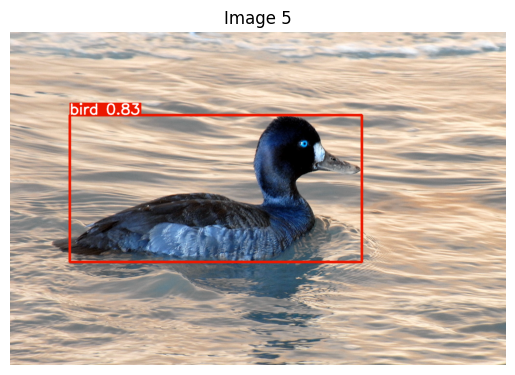

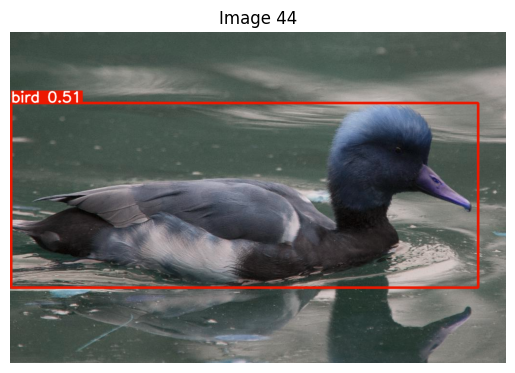

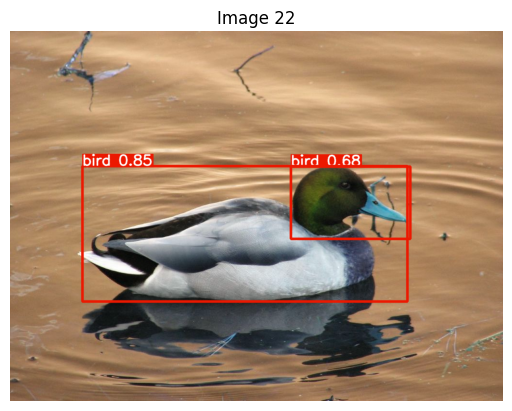

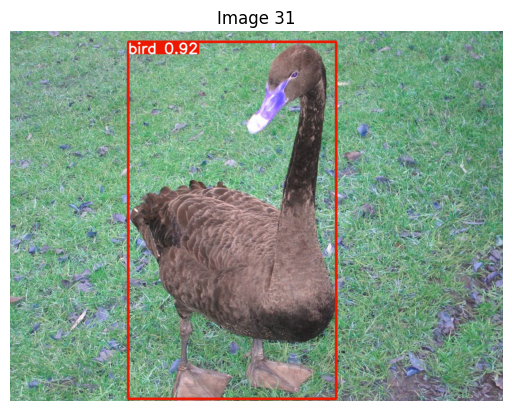

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/yolov8n.pt")  # Update with the correct path

# Path to the validation images directory
val_images_dir = "/content/gdrive/MyDrive/iiit/cv/train2/images/val"

# List all image files in the directory
image_files = os.listdir(val_images_dir)

# Get indices of 4 random images
image_indices = random.sample(range(len(image_files)), 4)

# Visualize the results
for idx in image_indices:
    image_path = os.path.join(val_images_dir, image_files[idx])
    image = Image.open(image_path)

    # Perform inference on the image
    results = model(image, verbose=False)[0]  # Get the first (and only) result from the list
    annotated_image = results.plot()  # Plot detection results on the image
    plt.imshow(annotated_image)
    plt.title(f"Image {idx + 1}")  # Set title
    plt.axis('off')  # Turn off axis
    plt.show()




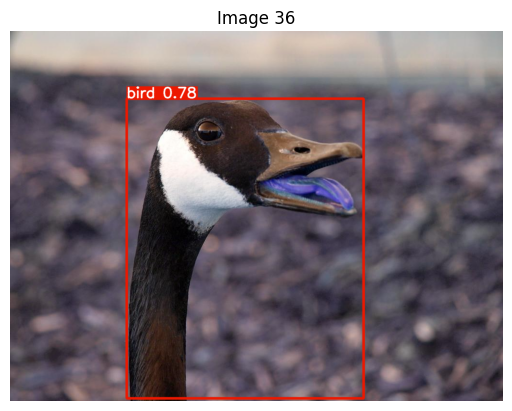

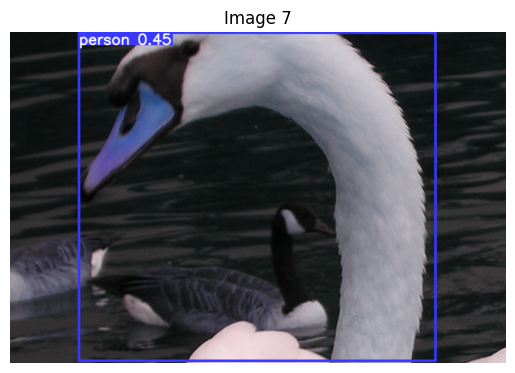

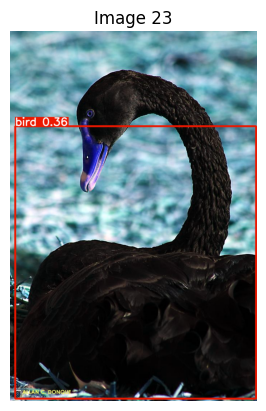

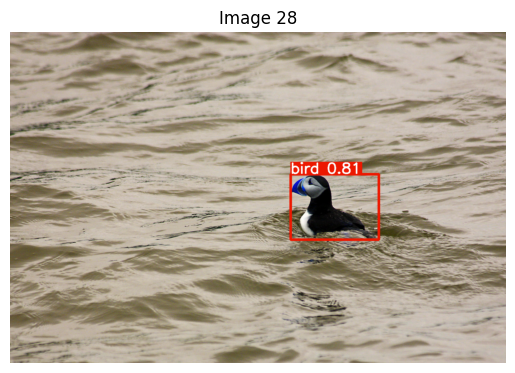

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/yolov8n.pt")  # Update with the correct path

# Path to the validation images directory
val_images_dir = "/content/gdrive/MyDrive/iiit/cv/train2/images/val"

# List all image files in the directory
image_files = os.listdir(val_images_dir)

# Get indices of 4 random images
image_indices = random.sample(range(len(image_files)), 4)

# Visualize the results
for idx in image_indices:
    image_path = os.path.join(val_images_dir, image_files[idx])
    image = Image.open(image_path)

    # Perform inference on the image
    results = model(image, verbose=False)[0]  # Get the first (and only) result from the list
    annotated_image = results.plot()  # Plot detection results on the image
    plt.imshow(annotated_image)
    plt.title(f"Image {idx + 1}")  # Set title
    plt.axis('off')  # Turn off axis
    plt.show()




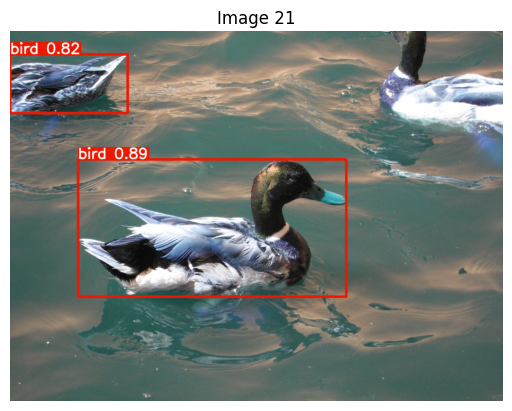

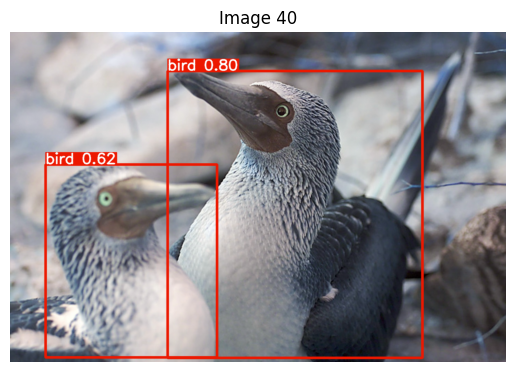

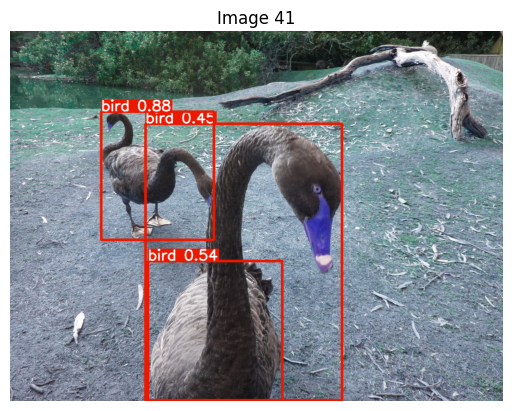

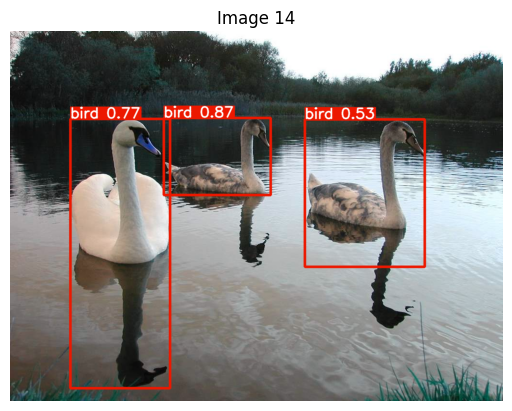

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/yolov8n.pt")  # Update with the correct path

# Path to the validation images directory
val_images_dir = "/content/gdrive/MyDrive/iiit/cv/train2/images/val"

# List all image files in the directory
image_files = os.listdir(val_images_dir)

# Get indices of 4 random images
image_indices = random.sample(range(len(image_files)), 4)

# Visualize the results
for idx in image_indices:
    image_path = os.path.join(val_images_dir, image_files[idx])
    image = Image.open(image_path)

    # Perform inference on the image
    results = model(image, verbose=False)[0]  # Get the first (and only) result from the list
    annotated_image = results.plot()  # Plot detection results on the image
    plt.imshow(annotated_image)
    plt.title(f"Image {idx + 1}")  # Set title
    plt.axis('off')  # Turn off axis
    plt.show()




### 2.5 Impact of augmentations.

(i) Does the default run use augmentations? Which ones and what do they do?

Yes, the default run does use augmentations, as indicated by the presence of augmentation operations in the output train logs. The augmentations applied include:

1. **Blur**: This augmentation introduces blur to the images with a probability of 0.01. The blur effect is randomly applied within a range specified by the blur_limit parameter, which controls the intensity of the blur.

2. **MedianBlur**: Similar to the Blur augmentation, MedianBlur also adds blur to the images with a probability of 0.01. The blur effect is applied using median blurring, with the intensity controlled by the blur_limit parameter.

3. **ToGray**: This augmentation converts the images to grayscale with a probability of 0.01, effectively removing color information from the images.

4. **CLAHE (Contrast Limited Adaptive Histogram Equalization)**: CLAHE is applied with a probability of 0.01. It enhances the contrast of the images by redistributing pixel intensities while limiting the amplification of noise. The clip_limit parameter controls the intensity of the contrast enhancement, while the tile_grid_size parameter determines the size of the grid used for histogram equalization.

These augmentations are applied probabilistically during training to augment the dataset, thereby increasing its diversity and robustness, and potentially improving the model's generalization performance.

(ii) For the yolov8n model with pretrained weights (trained on 100 images), remove all augmentations and
compare performance before and after. Is the change significant? If yes, why? If not, why?

In [ ]:
# all 0
from ultralytics import YOLO

zeroes_values = {
    "hsv_h":0,
    "hsv_s":0,
    "hsv_v":0,
    "degrees":0,
    "translate":0,
    "scale":0,
    "shear":0,
    "perspective":0,
    "flipud":0,
    "fliplr":0,
    "mosaic":0,
    "mixup":0,
    "bgr":0,
    "copy_paste":0,
    "erasing":0,
}

augement_values = zeroes_values.copy()
model = YOLO("yolov8n.pt")
trained = model.train(
    data="/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml",
    epochs=30,
    **augement_values
)
results = model.val()
print(results.results_dict['metrics/mAP50(B)'])

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.49G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.38G      1.224      9.235      1.446          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]


                   all         50         52     0.0034      0.981      0.353      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.39G     0.8816      13.17      1.156          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         50         52    0.00333      0.962      0.346      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.28G     0.8558       10.5      1.042          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         50         52    0.00333      0.962      0.124     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.29G     0.7909      7.066      1.125          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         50         52    0.00313      0.904       0.17     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.28G     0.7354      6.569      1.236          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         50         52     0.0028      0.808      0.102     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.29G     0.8291      8.243       1.19          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]


                   all         50         52    0.00293      0.846     0.0968     0.0254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.29G      0.805      5.952      1.164          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         50         52    0.00287      0.827     0.0903     0.0198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.29G     0.8446       6.91       1.16          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         50         52    0.00307      0.885      0.118     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.28G     0.6645      6.785      1.056          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         50         52    0.00313      0.904     0.0744     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.29G     0.4918       7.97     0.8544          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         50         52    0.00327      0.942     0.0422     0.0172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.29G     0.6927      4.791      1.187          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         50         52      0.202      0.154      0.113     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.29G     0.5207       4.72      1.035          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all         50         52      0.247      0.115     0.0897     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.29G      0.515      6.478      1.011          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]


                   all         50         52      0.356     0.0962      0.116     0.0596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.28G     0.4746      13.25     0.8811          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         50         52      0.102      0.135      0.117     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.29G     0.4556      6.546     0.8296          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         50         52      0.356      0.154       0.14     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.29G     0.4477       5.34     0.9339          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         50         52      0.184      0.173      0.128     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.29G     0.4139      4.923     0.8157          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all         50         52      0.287      0.194      0.143     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.28G     0.3569      5.315     0.7821          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]


                   all         50         52      0.176      0.269       0.14     0.0673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.29G     0.3729      4.768     0.7764          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         50         52      0.221      0.154      0.138     0.0731


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.42G     0.2639       5.31     0.7406          0        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         52      0.399      0.115      0.124     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.29G     0.2868       4.35     0.7488          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         50         52      0.373      0.115      0.117     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.28G     0.3282      3.168     0.8767          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         50         52       0.32      0.135       0.13     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.29G     0.3036      3.304     0.8491          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         50         52      0.366      0.133      0.112     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.29G     0.2462      2.542      0.833          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


                   all         50         52      0.261      0.115      0.101     0.0448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.29G     0.2196      3.825     0.7101          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         50         52      0.165     0.0577     0.0935     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.28G     0.1977      3.593      0.722          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         50         52      0.246     0.0385      0.102     0.0386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.29G     0.2128      2.173      0.828          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         50         52      0.644     0.0385      0.107     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.29G     0.1929      2.558     0.8526          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         50         52      0.726     0.0385      0.123     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.29G     0.1732      2.406     0.8312          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         50         52       0.77     0.0385      0.134     0.0597



30 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]


                   all         50         52     0.0034      0.981      0.356       0.22
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train2
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


                   all         50         52     0.0034      0.981      0.373      0.223
Speed: 0.6ms preprocess, 34.2ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/train22
0.37287408298689706


For the YOLOv8n model with pretrained weights trained on 100 images, the performance was evaluated before and after removing all augmentations.

Before removing augmentations, the model achieved a mean Average Precision (mAP50) of 0.45. After removing augmentations, the mAP50 decreased to 0.37.

The change in performance is significant because removing augmentations reduces the model's ability to generalize to variations in the input data. Augmentations such as blur, median blur, color jittering, and affine transformations help the model learn robust features by exposing it to a wider range of input variations during training. Removing these augmentations leads to a decrease in model performance as it becomes less capable of handling variations in real-world data.

(iii) Which augmentation is the most important? How did you determine this?


In [ ]:
from ultralytics import YOLO

# Dictionary containing all augmentation values set to 0
zeroes_values = {
    "hsv_h": 0,
    "hsv_s": 0,
    "hsv_v": 0,
    "degrees": 0,
    "translate": 0,
    "scale": 0,
    "shear": 0,
    "perspective": 0,
    "flipud": 0,
    "fliplr": 0,
    "mosaic": 0,
    "mixup": 0,
    "bgr": 0,
    "copy_paste": 0,
    "erasing": 0,
}

# Function to train the model and evaluate performance
def train_and_evaluate(augmentation_values):
    model = YOLO("yolov8n.pt")
    trained = model.train(
        data="/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml",
        epochs=20,
        **augmentation_values
    )
    results = model.val()
    mAP50 = results.results_dict['metrics/mAP50(B)']
    return mAP50

# List to store mAP50 scores
mAP50_scores = []

# Iterate over each augmentation and remove it one at a time
for augmentation in zeroes_values:
    # Copy the dictionary to avoid modifying the original one
    modified_values = zeroes_values.copy()
    # Remove the current augmentation
    del modified_values[augmentation]
    # Train and evaluate the model with the modified augmentation settings
    mAP50_without_augmentation = train_and_evaluate(modified_values)
    mAP50_scores.append((augmentation, mAP50_without_augmentation))

# Print the mAP50 scores for each augmentation removed
for augmentation, mAP50_score in mAP50_scores:
    print(f"mAP50 without {augmentation}: {mAP50_score}")


Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.38G      1.325      9.026      1.543          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         52    0.00333      0.962      0.436      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.44G      1.271      9.093      1.423          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         50         52     0.0034      0.981      0.415      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.44G     0.8083       12.6      1.039          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         50         52    0.00327      0.942      0.324      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.43G     0.8086      10.38       1.01          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         50         52     0.0032      0.923      0.218      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.44G     0.7447      6.591     0.9885          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]


                   all         50         52          1     0.0638       0.27      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.43G     0.6497      5.924     0.9921          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all         50         52    0.00327      0.942      0.106     0.0662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.44G     0.7466      9.415       1.07          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         50         52    0.00287      0.827     0.0723     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G     0.7535      5.242      1.049          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         50         52    0.00287      0.827       0.13     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.5883      5.854     0.9683          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         50         52      0.345     0.0577     0.0947     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.43G     0.6152      6.423      1.004          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         50         52     0.0615      0.519     0.0834     0.0255


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G     0.5647      6.387      1.129          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         52       0.21      0.108     0.0983     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.4846      6.691     0.8515          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50         52       0.32      0.209      0.226     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G     0.5762      4.835     0.9762          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         50         52      0.355      0.269      0.292      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G     0.5477      5.259     0.9649          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


                   all         50         52      0.369      0.259      0.271       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.43G     0.3879      6.434     0.7987          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]


                   all         50         52      0.304      0.327      0.268      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.41G     0.3572      3.666     0.9099          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         50         52      0.377      0.212      0.266      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.42G     0.3363      3.298     0.8752          2        640: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         50         52      0.537      0.212      0.257       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.42G     0.2677      5.975     0.7219          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


                   all         50         52      0.478      0.192      0.242       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.41G     0.2733      3.324     0.8372          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50         52      0.435      0.192      0.262      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.42G     0.2467      3.521     0.8311          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


                   all         50         52      0.475      0.173      0.264      0.129

20 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


                   all         50         52    0.00333      0.962      0.429       0.27
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train5
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all         50         52    0.00333      0.962      0.432      0.274
Speed: 1.2ms preprocess, 9.6ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train52
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, strea

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.41G      1.338      8.911      1.554          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         50         52    0.00333      0.962      0.429       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.43G      1.197          9      1.362          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         50         52     0.0034      0.981      0.401      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.43G     0.9052      12.49      1.091          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         50         52    0.00273      0.788      0.178     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.42G     0.9514       10.6      1.046          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         50         52    0.00293      0.846     0.0548     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.44G     0.7362      6.453      1.004          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         50         52    0.00273      0.788     0.0998     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.43G     0.6661      5.941      1.021          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         50         52    0.00287      0.827     0.0633     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.44G     0.8455      8.128      1.027          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         50         52    0.00313      0.904      0.155     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G     0.5656      5.264     0.8984          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         50         52      0.003      0.865      0.158     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.5922      5.372     0.9882          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         50         52       0.96     0.0769      0.146     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.43G     0.5892      6.466      1.002          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         50         52       0.67     0.0769      0.121     0.0672
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G     0.6031      5.846      1.052          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         52      0.728      0.115      0.175     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.45G     0.5136      6.458     0.8473          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50         52      0.436      0.104      0.155       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G     0.5173      4.396     0.9336          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


                   all         50         52      0.396      0.135       0.16     0.0643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.42G     0.4987      4.882     0.9301          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         50         52       0.35      0.104       0.15     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.4G     0.4111      5.737     0.7788          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         50         52      0.304      0.115      0.201        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.41G     0.4192       3.73     0.9059          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         50         52      0.349      0.135      0.228      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.41G     0.3501      3.286     0.8646          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         50         52      0.294      0.135      0.221      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.41G     0.2851      6.038     0.7206          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         50         52      0.309      0.192      0.216      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.41G     0.2751      3.413     0.8362          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50         52      0.282      0.192      0.209      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G     0.2609      3.562     0.8425          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]


                   all         50         52      0.332      0.154      0.209      0.113

20 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


                   all         50         52    0.00333      0.962      0.423      0.271
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train6
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


                   all         50         52    0.00333      0.962      0.435      0.274
Speed: 0.5ms preprocess, 5.9ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train62
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, strea

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.44G      1.339       8.96      1.506          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


                   all         50         52     0.0034      0.981      0.487      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.45G      1.213      8.187      1.465          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         50         52     0.0034      0.981      0.314      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.45G     0.8636      12.62      1.099          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50         52    0.00333      0.962      0.393      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.44G     0.7352       10.4      1.008          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         50         52    0.00327      0.942      0.346      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.46G      0.741       6.72      1.014          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         50         52     0.0032      0.923      0.277       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.45G     0.7777      6.649       1.06          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         50         52      0.003      0.865      0.172     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.46G     0.7774      7.569      1.091          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]


                   all         50         52    0.00293      0.846      0.107     0.0497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.46G     0.7513      6.154      1.066          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         50         52    0.00287      0.827     0.0789     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.46G     0.6561        5.7      1.041          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]


                   all         50         52    0.00307      0.885      0.133     0.0565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.45G     0.5973      5.782      1.055          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         50         52      0.418     0.0419      0.096     0.0388


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.46G       0.56      5.797      1.091          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         52      0.304     0.0769     0.0803     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.46G      0.506       6.83     0.8572          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         50         52      0.184      0.173     0.0755     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.41G     0.4768      3.997     0.9485          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         50         52      0.183      0.154     0.0798     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.4G     0.5286       4.68     0.9535          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         50         52      0.265      0.115     0.0992     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.4G     0.4365      6.293     0.8105          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         50         52      0.357     0.0962      0.141     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.4G     0.4072      3.817     0.9131          2        640: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         50         52      0.268      0.154      0.161     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.4G     0.3465      3.366     0.8742          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         50         52      0.247      0.173      0.151     0.0751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.41G     0.2955      6.346     0.7178          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         50         52      0.228      0.135      0.147     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.4G     0.2766      3.734     0.8407          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         50         52       0.46      0.115      0.165     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G     0.2438      3.625     0.8358          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.59it/s]

                   all         50         52      0.447     0.0779      0.173     0.0829



20 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


                   all         50         52     0.0034      0.981      0.499      0.345
Speed: 0.6ms preprocess, 2.4ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train7
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


                   all         50         52     0.0034      0.981      0.492      0.339
Speed: 0.6ms preprocess, 11.7ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train72
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stre

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.48G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:27<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.41G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.41G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all         50         52    0.00333      0.962      0.276      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.42G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


                   all         50         52    0.00327      0.942     0.0968     0.0485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.41G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50         52    0.00313      0.904      0.142     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.42G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         50         52    0.00543      0.788     0.0838     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.42G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]


                   all         50         52     0.0032      0.923     0.0593     0.0137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.42G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.41G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


                   all         50         52      0.173     0.0192     0.0805     0.0351
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.42G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.42G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.42G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         50         52     0.0796     0.0577     0.0528     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.42G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.41G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.42G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.42G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.42G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         50         52       0.74     0.0769       0.19     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.41G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         50         52      0.664      0.115      0.246      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.42G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50         52      0.733      0.115      0.264      0.116



20 epochs completed in 0.025 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train8
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.5ms preprocess, 7.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train82
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, strea

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.41G      1.205      8.368      1.413          3        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         50         52     0.0034      0.981      0.392      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.43G      1.078      8.147      1.276          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         50         52     0.0034      0.981      0.365      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.43G     0.8058      12.53      1.057          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


                   all         50         52     0.0034      0.981      0.235     0.0927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.43G     0.7609      10.04     0.9737          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         50         52    0.00327      0.942      0.123     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.44G     0.9415      7.382      1.167          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         50         52    0.00333      0.962      0.149     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.43G     0.9008      6.747      1.201          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         50         52    0.00313      0.904     0.0736     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.44G     0.8072      7.983       1.02          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         50         52     0.0032      0.923     0.0229     0.0072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G      1.047      6.921      1.293          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         50         52    0.00327      0.942     0.0237    0.00757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G      1.001      6.612      1.198          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


                   all         50         52      0.003      0.865      0.161     0.0412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.43G     0.7512       6.94      1.056          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


                   all         50         52    0.00313      0.904     0.0959     0.0264
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G     0.7434       6.15       1.09          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         52     0.0593      0.365      0.137     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.6865      7.256     0.9193          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50         52      0.508     0.0769      0.153      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G     0.7413      4.891      1.076          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         50         52      0.361     0.0962      0.151      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.41G     0.7836      5.572      1.128          2        640: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         50         52      0.326     0.0962      0.129      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.4G     0.6485      7.196     0.8931          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         50         52      0.584     0.0769      0.102     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.4G     0.6713      4.484      1.054          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         50         52      0.369      0.135      0.165     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.4G     0.5984      4.138     0.9179          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         50         52      0.388      0.154      0.202     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.4G     0.4813       7.45     0.8657          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         50         52      0.729      0.154      0.228      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.4G     0.5801      4.349     0.9745          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         50         52      0.725      0.152      0.222      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G     0.5212       4.18     0.9585          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         50         52      0.641      0.154      0.225      0.112



20 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


                   all         50         52     0.0034      0.981      0.394       0.24
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train9
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


                   all         50         52     0.0034      0.981       0.39      0.242
Speed: 0.7ms preprocess, 6.9ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train92
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stre

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.52G      1.232       8.39      1.333          3        640: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all         50         52    0.00333      0.962        0.4      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.54G      1.281      8.635      1.339          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         52     0.0034      0.981      0.485      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.55G       0.95      13.45      1.109          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         50         52     0.0034      0.981      0.465      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.54G     0.9456       11.3       0.95          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


                   all         50         52    0.00333      0.962      0.402      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.55G      1.295      7.282      1.379          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         50         52    0.00333      0.962      0.297      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.54G       1.02      7.206      1.251          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         50         52    0.00333      0.962      0.171     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.52G      1.037      8.634      1.194          2        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50         52     0.0032      0.923      0.113     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.45G      1.366      8.063      1.595          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         50         52      0.342      0.115      0.154     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.45G      1.612      7.656      1.537          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         50         52      0.262     0.0962      0.148       0.05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.45G      1.152       7.71      1.352          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         50         52      0.391      0.135      0.157     0.0555


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.45G      1.265      9.924      1.544          1        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         52      0.265      0.115      0.095     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.45G      1.129      8.624      1.252          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         50         52      0.313      0.154      0.145     0.0533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.45G      1.411      7.344      1.624          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         50         52      0.225      0.134      0.114     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.45G      1.237      7.314      1.393          2        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         50         52      0.102      0.308     0.0861     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.45G      0.918      7.959      1.182          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]


                   all         50         52      0.128      0.115     0.0839     0.0297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.45G      1.259      6.093      1.674          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         50         52      0.122      0.274     0.0755     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.45G      1.219      6.204      1.447          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         50         52      0.119       0.25     0.0693     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.45G      1.071      8.236      1.199          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         50         52      0.148      0.269     0.0971     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.45G      1.191      6.781      1.342          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         50         52      0.185      0.253      0.134     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.45G     0.9299      6.487      1.257          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         50         52      0.264      0.212      0.188     0.0841



20 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


                   all         50         52     0.0034      0.981      0.483      0.335
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train10
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


                   all         50         52     0.0034      0.981      0.478      0.339
Speed: 0.7ms preprocess, 9.4ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/train102
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.45G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.42G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.42G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         50         52    0.00333      0.962      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.42G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


                   all         50         52    0.00327      0.942     0.0968     0.0485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.42G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         50         52    0.00313      0.904      0.142     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.42G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         50         52    0.00543      0.788     0.0838     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.42G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         50         52     0.0032      0.923     0.0593     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.42G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.42G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all         50         52      0.173     0.0192     0.0805     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.42G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


                   all         50         52          1     0.0373     0.0973     0.0441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.42G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.42G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


                   all         50         52     0.0796     0.0577     0.0528     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.42G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]


                   all         50         52    0.00513      0.923     0.0801     0.0357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.42G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.42G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.42G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.42G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         50         52       0.74     0.0769       0.19     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.42G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         50         52      0.664      0.115      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.42G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         50         52      0.733      0.115      0.264      0.116



20 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train11
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.8ms preprocess, 7.8ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/detect/train112
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train12
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.46G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.45G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.46G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]


                   all         50         52    0.00333      0.962       0.32      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.45G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         50         52    0.00333      0.962      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.46G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         50         52    0.00327      0.942     0.0968     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.45G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]


                   all         50         52    0.00313      0.904      0.142     0.0561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.46G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all         50         52    0.00543      0.788     0.0838     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.46G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         50         52     0.0032      0.923     0.0593     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.46G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]


                   all         50         52      0.457     0.0385     0.0787     0.0252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.45G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         50         52      0.173     0.0192     0.0805     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.46G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.46G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.46G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         50         52     0.0796     0.0577     0.0528     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.46G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.45G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.46G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]


                   all         50         52      0.767     0.0769      0.177     0.0765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.46G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.46G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]


                   all         50         52       0.74     0.0769       0.19     0.0836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.45G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         50         52      0.664      0.115      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.46G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         50         52      0.733      0.115      0.264      0.116



20 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 6.2MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train12
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.9ms preprocess, 7.6ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/train122
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train13
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.5G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.44G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.44G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.44G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         50         52    0.00333      0.962      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.44G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50         52    0.00327      0.942     0.0968     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.44G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]


                   all         50         52    0.00313      0.904      0.142     0.0561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.44G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]


                   all         50         52    0.00543      0.788     0.0838     0.0264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         50         52     0.0032      0.923     0.0593     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.44G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all         50         52      0.173     0.0192     0.0805     0.0351
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.57G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         50         52     0.0796     0.0577     0.0528     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.44G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.44G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.44G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.44G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         50         52       0.74     0.0769       0.19     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.44G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         50         52      0.664      0.115      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.44G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]


                   all         50         52      0.733      0.115      0.264      0.116

20 epochs completed in 0.026 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 6.2MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train13
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.9ms preprocess, 7.5ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train132
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train14
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.48G      1.346      8.588      1.541          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         50         52     0.0034      0.981      0.357       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.44G       1.29      9.075      1.423          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         50         52     0.0034      0.981      0.483      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.43G     0.9105      12.55      1.115          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         50         52    0.00333      0.962      0.359      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.43G     0.8025      10.63      1.037          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


                   all         50         52    0.00333      0.962      0.207      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.43G     0.9049      7.183      1.201          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         50         52    0.00333      0.962      0.149     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.43G     0.8755        7.3      1.203          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]


                   all         50         52    0.00333      0.962      0.149     0.0666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.43G     0.9205      7.876      1.225          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         50         52    0.00327      0.942      0.117     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G     0.9572      6.009      1.277          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         50         52     0.0943      0.115     0.0724     0.0255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.8234      5.745      1.224          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         50         52    0.00307      0.885     0.0732     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.43G     0.8255      6.664      1.283          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all         50         52     0.0123      0.635      0.102     0.0354


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.57G     0.9495      6.689      1.404          1        640: 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         52      0.211      0.192      0.106     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.6577      7.032      1.027          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         50         52      0.105      0.115     0.0617     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.43G     0.5623      4.914       1.02          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50         52      0.128      0.154     0.0624     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G      0.593      6.393     0.9882          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]


                   all         50         52      0.187      0.154     0.0722     0.0164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.44G     0.5279      6.641     0.9105          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         50         52      0.232      0.212      0.103     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.43G     0.5752      4.634      1.055          2        640: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         50         52      0.336      0.231      0.194     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.43G     0.5283      3.862     0.9884          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         50         52      0.252      0.288      0.209      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.44G      0.403      6.554     0.8127          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         50         52      0.283      0.365      0.255      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.44G     0.4792      4.511     0.9651          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


                   all         50         52      0.344      0.288      0.276      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.43G      0.386      4.328     0.9049          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         50         52      0.411      0.269       0.27      0.118



20 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 6.2MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]


                   all         50         52     0.0034      0.981      0.479      0.292
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train14
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


                   all         50         52     0.0034      0.981      0.482       0.29
Speed: 1.3ms preprocess, 7.8ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train142
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train15
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.49G      1.379      6.087      1.451          3        640: 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50         52    0.00333      0.962      0.362      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.51G     0.9476      8.947      1.121          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         50         52     0.0034      0.981      0.323      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.44G     0.9442      4.941      1.165          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]


                   all         50         52    0.00333      0.962      0.305      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.44G     0.8223      5.238      1.079          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         50         52    0.00333      0.962      0.183     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.44G      1.037      5.776      1.257          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         50         52    0.00313      0.904     0.0896     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.44G      1.035      4.986      1.296          5        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         50         52    0.00307      0.885     0.0858     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.44G      1.161      5.181      1.409          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         50         52    0.00307      0.885     0.0967     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G      1.091      4.131      1.261          5        640: 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         50         52     0.0032      0.923     0.0629      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.9527      5.454      1.266          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         50         52     0.0032      0.923     0.0716     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.44G     0.9586      4.668      1.121          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         50         52     0.0032      0.923     0.0865     0.0301


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G     0.9725      8.491      1.351          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52    0.00287      0.827      0.134     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.6964      8.516      1.063          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


                   all         50         52      0.632      0.115      0.199      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G     0.6141      5.181       1.02          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         50         52          1     0.0533      0.204       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G     0.6022      6.478      1.017          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         50         52    0.00445      0.846      0.171     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.44G     0.4992      7.601     0.8681          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50         52      0.469      0.115       0.16     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.44G     0.5524      4.626      1.047          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


                   all         50         52      0.409      0.135      0.179     0.0769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.44G     0.4355      3.874     0.9738          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         50         52      0.469      0.135      0.187     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.44G     0.3832      7.638     0.7886          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         50         52      0.547      0.154      0.207      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.44G     0.4237      4.435     0.9564          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         50         52      0.515      0.192      0.218      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.44G     0.3056      4.159     0.8738          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all         50         52      0.601      0.174      0.224      0.117

20 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 6.2MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         50         52    0.00333      0.962      0.364      0.246
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train15
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


                   all         50         52    0.00333      0.962      0.346      0.234
Speed: 0.8ms preprocess, 8.5ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train152
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train16
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.48G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]


                   all         50         52     0.0034      0.981      0.346      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.52G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.53G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.43G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         50         52    0.00333      0.962      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.43G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         50         52    0.00327      0.942     0.0968     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.43G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50         52    0.00313      0.904      0.142     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.43G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         50         52    0.00543      0.788     0.0838     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


                   all         50         52     0.0032      0.923     0.0593     0.0137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.43G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.43G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         50         52      0.173     0.0192     0.0805     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.56G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.43G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.43G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         50         52     0.0796     0.0577     0.0528     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.43G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.43G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.43G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.43G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.43G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         50         52       0.74     0.0769       0.19     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.43G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         50         52      0.664      0.115      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.43G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]


                   all         50         52      0.733      0.115      0.264      0.116

20 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 6.2MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train16
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.4ms preprocess, 8.2ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train162
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train17
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.48G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.5G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.51G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.5G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         50         52    0.00333      0.962      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.46G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         50         52    0.00327      0.942     0.0968     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.44G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         50         52    0.00313      0.904      0.142     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.44G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         50         52    0.00543      0.788     0.0838     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


                   all         50         52     0.0032      0.923     0.0593     0.0137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.44G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         50         52      0.173     0.0192     0.0805     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         50         52     0.0525     0.0962      0.042     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


                   all         50         52     0.0796     0.0577     0.0528     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.44G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.44G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.44G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.44G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


                   all         50         52       0.74     0.0769       0.19     0.0836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.44G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         50         52      0.664      0.115      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.44G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]


                   all         50         52      0.733      0.115      0.264      0.116

20 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 6.2MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train17
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train172
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train18
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.48G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.52G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.53G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.52G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         50         52    0.00333      0.962      0.276      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.53G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         50         52    0.00327      0.942     0.0968     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.52G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all         50         52    0.00313      0.904      0.142     0.0561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.47G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         50         52    0.00543      0.788     0.0838     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.44G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         50         52     0.0032      0.923     0.0593     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.44G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         50         52      0.173     0.0192     0.0805     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.57G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.44G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.44G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         50         52     0.0796     0.0577     0.0528     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.44G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.44G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.44G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]


                   all         50         52      0.648     0.0769       0.18     0.0811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.44G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         50         52       0.74     0.0769       0.19     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.44G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         50         52      0.664      0.115      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.44G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         50         52      0.733      0.115      0.264      0.116



20 epochs completed in 0.029 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 6.2MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train18
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 0.6ms preprocess, 8.9ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train182
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/iiit/cv/train1/config1.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, str

train: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train19
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.43G      1.417      8.767      1.583          3        640: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         50         52     0.0034      0.981      0.346      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.46G      1.204      9.151      1.429          1        640: 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         50         52    0.00333      0.962      0.392      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.47G     0.8893      13.53      1.133          0        640: 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50         52    0.00333      0.962       0.32      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.46G     0.8528      10.42      1.072          0        640: 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


                   all         50         52    0.00333      0.962      0.276      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.47G     0.8228      6.884       1.12          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]


                   all         50         52    0.00327      0.942     0.0968     0.0485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.46G     0.7365       6.16      1.053          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         50         52    0.00313      0.904      0.142     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.42G     0.7082      7.116      1.095          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]


                   all         50         52    0.00543      0.788     0.0838     0.0264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.41G     0.6946      5.496       1.06          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         50         52     0.0032      0.923     0.0593     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.41G     0.5941      5.785     0.9823          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]

                   all         50         52      0.457     0.0385     0.0787     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.41G     0.5036      5.664     0.9573          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         50         52      0.173     0.0192     0.0805     0.0351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.41G     0.5872       5.63      1.034          1        640: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         50         52          1     0.0373     0.0973     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.41G     0.5553      6.605     0.8723          0        640: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         50         52     0.0525     0.0962      0.042     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.41G      0.472      4.269     0.9347          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


                   all         50         52     0.0796     0.0577     0.0528     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.41G     0.4935      4.473     0.9428          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         50         52    0.00513      0.923     0.0801     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.4G     0.4132      5.684     0.8308          0        640: 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         50         52      0.576     0.0385      0.147     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.41G     0.4114      3.682     0.9262          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         50         52      0.767     0.0769      0.177     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.41G     0.3528      3.309     0.8879          2        640: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         50         52      0.648     0.0769       0.18     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.41G     0.3203      5.807     0.7394          0        640: 100%|██████████| 7/7 [00:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         50         52       0.74     0.0769       0.19     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.4G     0.3114      3.396     0.8598          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         50         52      0.664      0.115      0.246      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.41G     0.2859      3.422     0.8493          1        640: 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         50         52      0.733      0.115      0.264      0.116



20 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 6.2MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


                   all         50         52    0.00333      0.962      0.376      0.232
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train19
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/iiit/cv/train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


                   all         50         52    0.00333      0.962      0.397      0.233
Speed: 1.8ms preprocess, 7.8ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train192
mAP50 without hsv_h: 0.43192843656871444
mAP50 without hsv_s: 0.43481537756552346
mAP50 without hsv_v: 0.49154059660983757
mAP50 without degrees: 0.3973181697382522
mAP50 without translate: 0.3901961511090552
mAP50 without scale: 0.4777685329880873
mAP50 without shear: 0.3973181697382522
mAP50 without perspective: 0.3973181697382522
mAP50 without flipud: 0.3973181697382522
mAP50 without fliplr: 0.4823882037379615
mAP50 without mosaic: 0.34637803193522587
mAP50 without mixup: 0.3973181697382522
mAP50 without bgr: 0.3973181697382522
mAP50 without copy_paste: 0.3973181697382522
mAP50 without erasing: 0.3973181697382522


In [ ]:
# Print the mAP50 scores for each augmentation removed
for augmentation, mAP50_score in mAP50_scores:
    print(f"mAP50 without {augmentation}: {mAP50_score}")

mAP50 without hsv_h: 0.43192843656871444
mAP50 without hsv_s: 0.43481537756552346
mAP50 without hsv_v: 0.49154059660983757
mAP50 without degrees: 0.3973181697382522
mAP50 without translate: 0.3901961511090552
mAP50 without scale: 0.4777685329880873
mAP50 without shear: 0.3973181697382522
mAP50 without perspective: 0.3973181697382522
mAP50 without flipud: 0.3973181697382522
mAP50 without fliplr: 0.4823882037379615
mAP50 without mosaic: 0.34637803193522587
mAP50 without mixup: 0.3973181697382522
mAP50 without bgr: 0.3973181697382522
mAP50 without copy_paste: 0.3973181697382522
mAP50 without erasing: 0.3973181697382522


It seems like removing certain augmentations such as `hsv_v`, `scale`, `fliplr`, and `mosaic` resulted in significant improvements in mAP50 scores, indicating that these augmentations might have been impacting the model's performance. On the other hand, removing some augmentations like `translate`, `shear`, `perspective`, `flipud`, `mixup`, `bgr`, `copy_paste`, and `erasing` did not significantly affect the performance, suggesting that these augmentations may not be as crucial for this specific model and dataset.